In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
train_data = pd.read_csv('Telecom_Train.csv')
test_data = pd.read_csv('Telecom_Test.csv')

<h3>Exploaratory Data Analysis</h3>

In [4]:
#shape of the data
train_data.shape, test_data.shape

((3333, 21), (1667, 21))

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3333 non-null   int64  
 1   state                          3333 non-null   object 
 2   account_length                 3333 non-null   int64  
 3   area_code                      3333 non-null   object 
 4   international_plan             3333 non-null   object 
 5   voice_mail_plan                3333 non-null   object 
 6   number_vmail_messages          3333 non-null   int64  
 7   total_day_minutes              3333 non-null   float64
 8   total_day_calls                3333 non-null   int64  
 9   total_day_charge               3333 non-null   float64
 10  total_eve_minutes              3333 non-null   float64
 11  total_eve_calls                3333 non-null   int64  
 12  total_eve_charge               3333 non-null   f

In [6]:
train_data.head()

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    KS             128  area_code_415                 no   
1           2    OH             107  area_code_415                 no   
2           3    NJ             137  area_code_415                 no   
3           4    OH              84  area_code_408                yes   
4           5    OK              75  area_code_415                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churn  
0                              1     no  
1                              1     no  
2                              0     no  
3                              2     no  
4                              3     no  

[5 rows x 21 columns]

In [7]:
#checking data types in data
train_data.dtypes.sort_values()

Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object

In [8]:
#checking null values
train_data.isnull().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [9]:
#checking uniques values in data
train_data.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   119
total_night_calls                 120
total_eve_calls                   123
total_intl_charge                 162
total_intl_minutes                162
account_length                    212
total_night_charge                933
total_eve_charge                 1440
total_night_minutes              1591
total_eve_minutes                1611
total_day_minutes                1667
total_day_charge                 1667
Unnamed: 0                       3333
dtype: int64

In [10]:
stats = pd.DataFrame({'Unique Values' : train_data.nunique(),'Null Values' : train_data.isnull().sum(), 'Data Type' : train_data.dtypes}).sort_values('Unique Values')
stats

Unique Values  Null Values Data Type
churn                                      2            0    object
international_plan                         2            0    object
voice_mail_plan                            2            0    object
area_code                                  3            0    object
number_customer_service_calls             10            0     int64
total_intl_calls                          21            0     int64
number_vmail_messages                     46            0     int64
state                                     51            0    object
total_day_calls                          119            0     int64
total_night_calls                        120            0     int64
total_eve_calls                          123            0     int64
total_intl_charge                        162            0   float64
total_intl_minutes                       162            0   float64
account_length                           212            0     int64
total_night_charge                       933            0   float64
total_eve_charge                        1440            0   float64
total_night_minutes                     1591            0   float64
total_eve_minutes                       1611            0   float64
total_day_minutes                       1667            0   float64
total_day_charge                        1667            0   float64
Unnamed: 0                              3333            0     int64

In [11]:
train_data['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [12]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

In [13]:
#removing extra unnamed column
train_data_copy.drop('Unnamed: 0',axis=1, inplace=True)
test_data_copy.drop('Unnamed: 0',axis=1, inplace=True)

In [14]:
train_data_copy['international_plan'].apply(lambda x:1 if x=='yes' else 0).value_counts(), train_data_copy['international_plan'].value_counts()

(international_plan
 0    3010
 1     323
 Name: count, dtype: int64,
 international_plan
 no     3010
 yes     323
 Name: count, dtype: int64)

In [15]:
binary_vars = [x for x in stats.index if (stats['Data Type'][x]=='object' and stats['Unique Values'][x]==2)]

In [16]:
def convert_cat_binary(df, var):
    df[var+'_num'] = df[var].apply(lambda x:1 if x=='yes' else 0)
    print(df.groupby([var+'_num',var]).size())
    return df

In [17]:
for var in binary_vars:
    train_data_copy = convert_cat_binary(train_data_copy,var)
    test_data_copy = convert_cat_binary(test_data_copy,var)

churn_num  churn
0          no       2850
1          yes       483
dtype: int64
churn_num  churn
0          no       1443
1          yes       224
dtype: int64
international_plan_num  international_plan
0                       no                    3010
1                       yes                    323
dtype: int64
international_plan_num  international_plan
0                       no                    1517
1                       yes                    150
dtype: int64
voice_mail_plan_num  voice_mail_plan
0                    no                 2411
1                    yes                 922
dtype: int64
voice_mail_plan_num  voice_mail_plan
0                    no                 1266
1                    yes                 401
dtype: int64


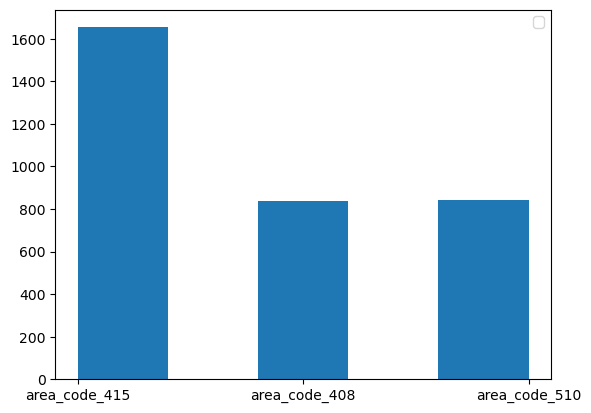

In [18]:
plt.hist(train_data_copy['area_code'], bins=5)
plt.legend('')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


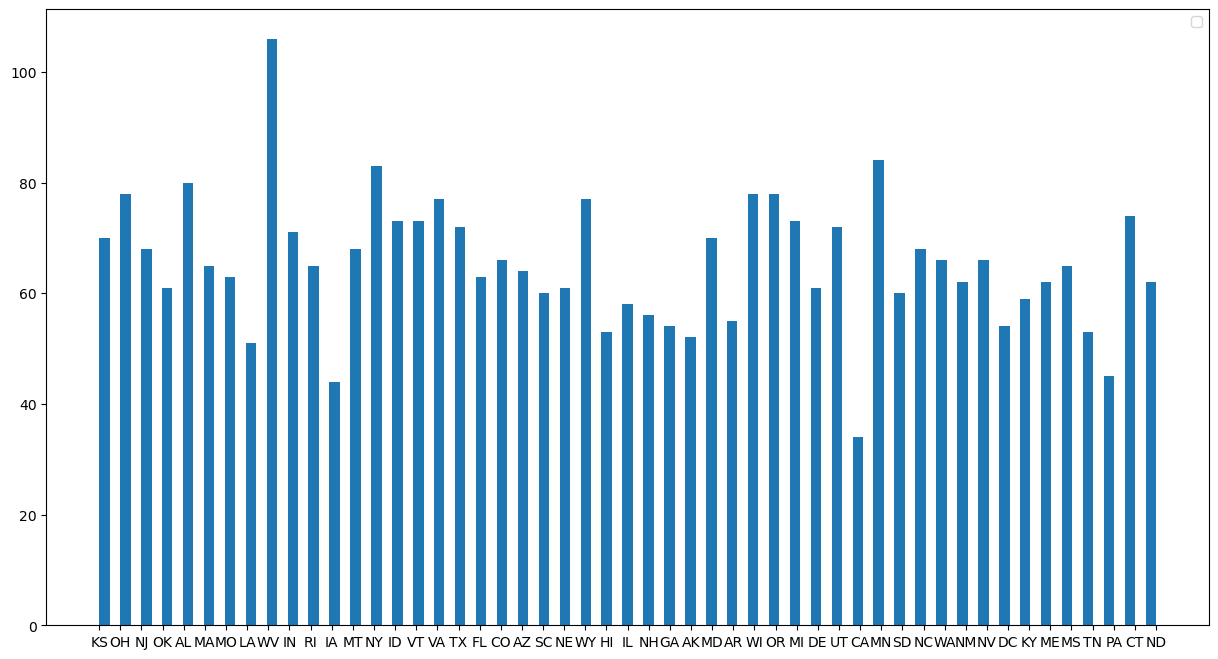

In [19]:
plt.figure(figsize=(15,8))
plt.hist(train_data_copy['state'], bins=101)
plt.legend()

In [20]:
train_data_copy.select_dtypes('number').mean()

account_length                   101.064806
number_vmail_messages              8.099010
total_day_minutes                179.775098
total_day_calls                  100.435644
total_day_charge                  30.562307
total_eve_minutes                200.980348
total_eve_calls                  100.114311
total_eve_charge                  17.083540
total_night_minutes              200.872037
total_night_calls                100.107711
total_night_charge                 9.039325
total_intl_minutes                10.237294
total_intl_calls                   4.479448
total_intl_charge                  2.764581
number_customer_service_calls      1.562856
churn_num                          0.144914
international_plan_num             0.096910
voice_mail_plan_num                0.276628
dtype: float64

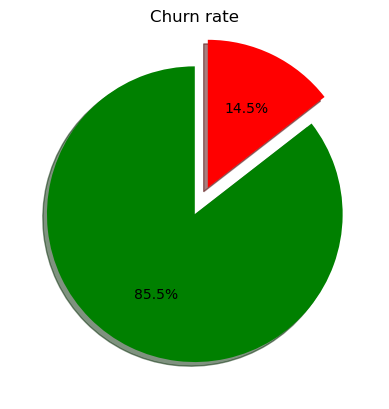

In [21]:
colors = ['green','red']
plt.pie(train_data['churn'].value_counts(sort=True),colors=colors, shadow=True, startangle=90, autopct='%1.1f%%', explode=[0,0.2])
plt.title('Churn rate')
plt.show()

In [31]:
#getting all the continuous vars
continuous_var = train_data_copy.select_dtypes([np.number]).columns.to_list()

In [33]:
continuous_var = [x for x in continuous_var if '_num' not in x]

In [35]:
call_var = [x for x in continuous_var if 'calls' in x]

<Axes: >

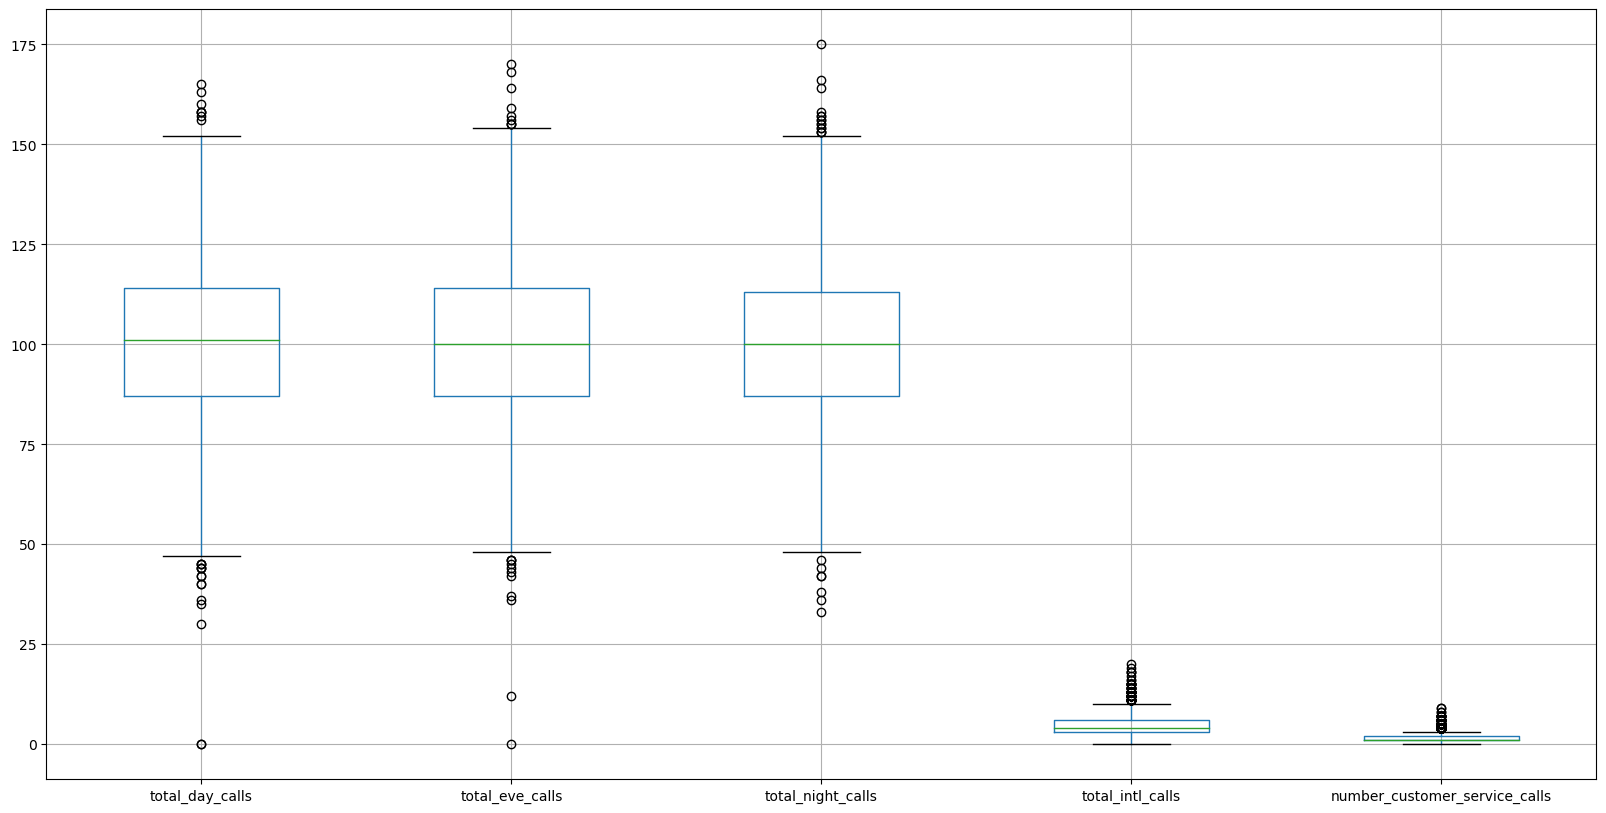

In [40]:
train_data_copy.boxplot(column=call_var, figsize=(20,10))

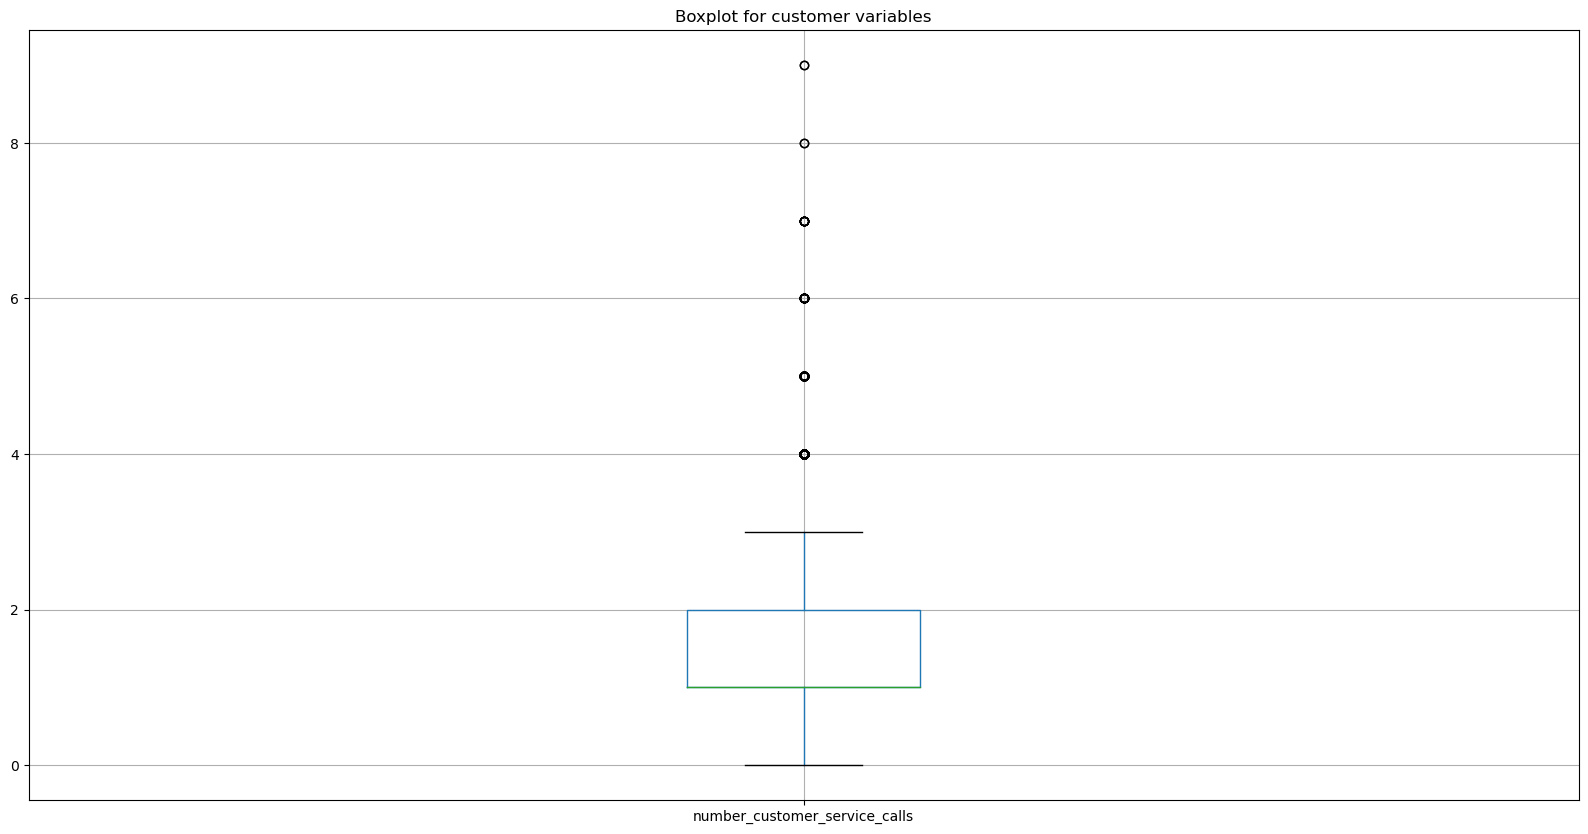

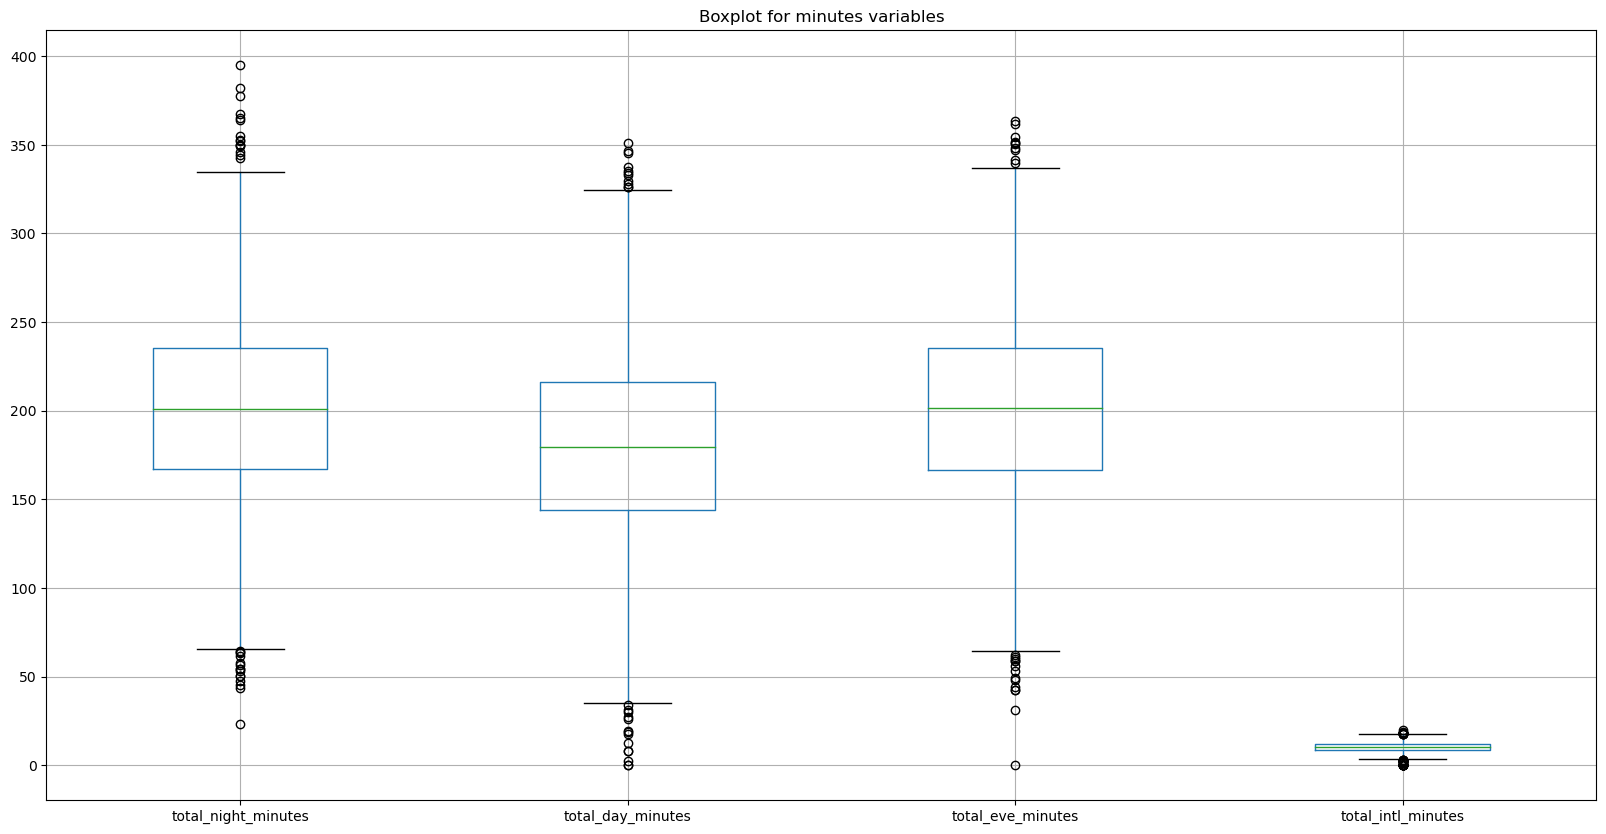

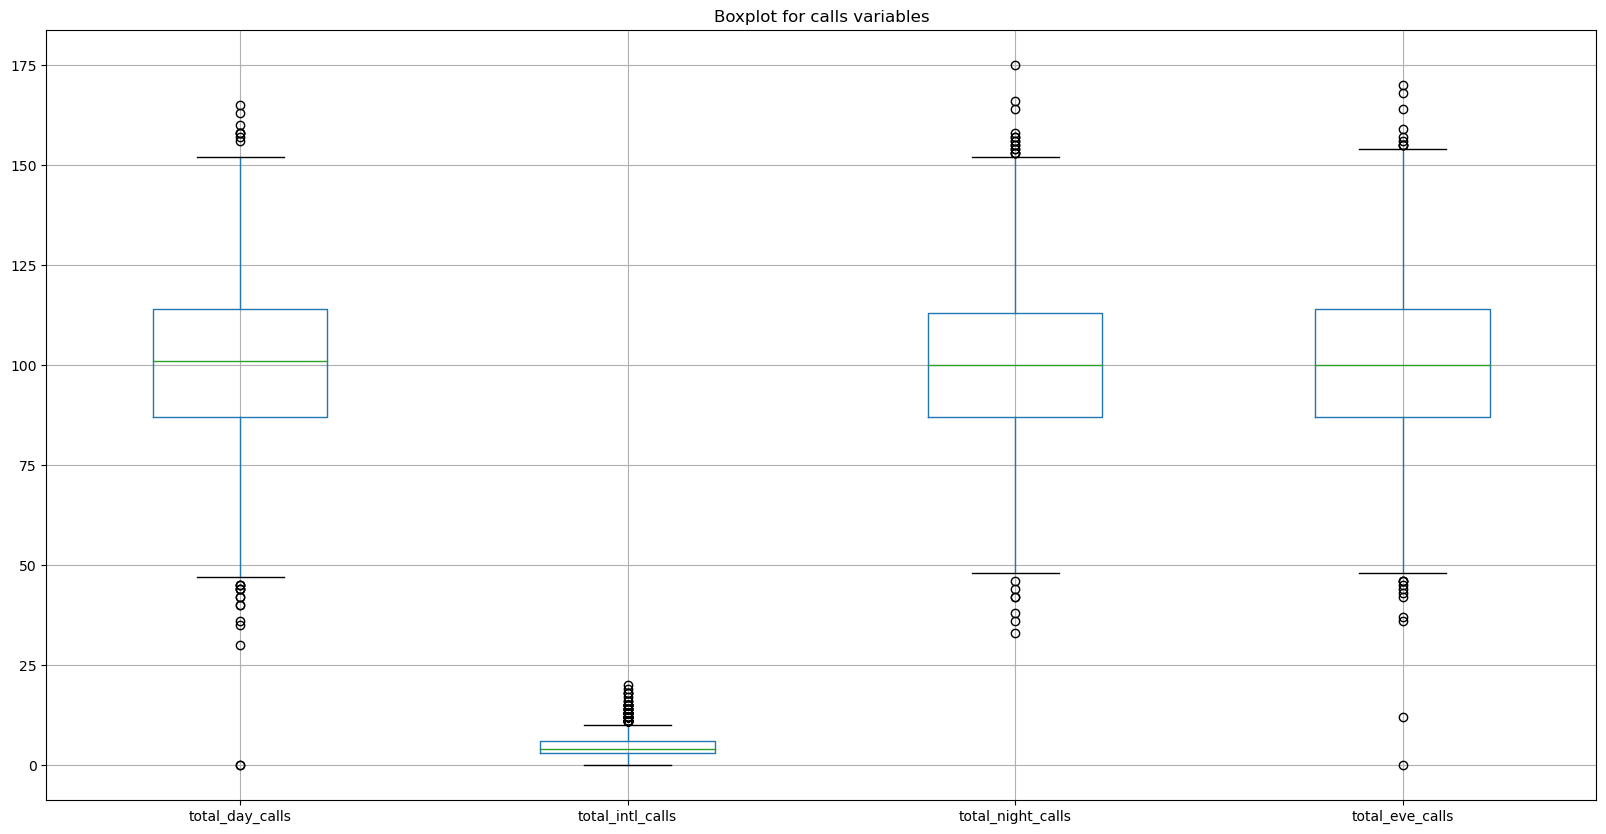

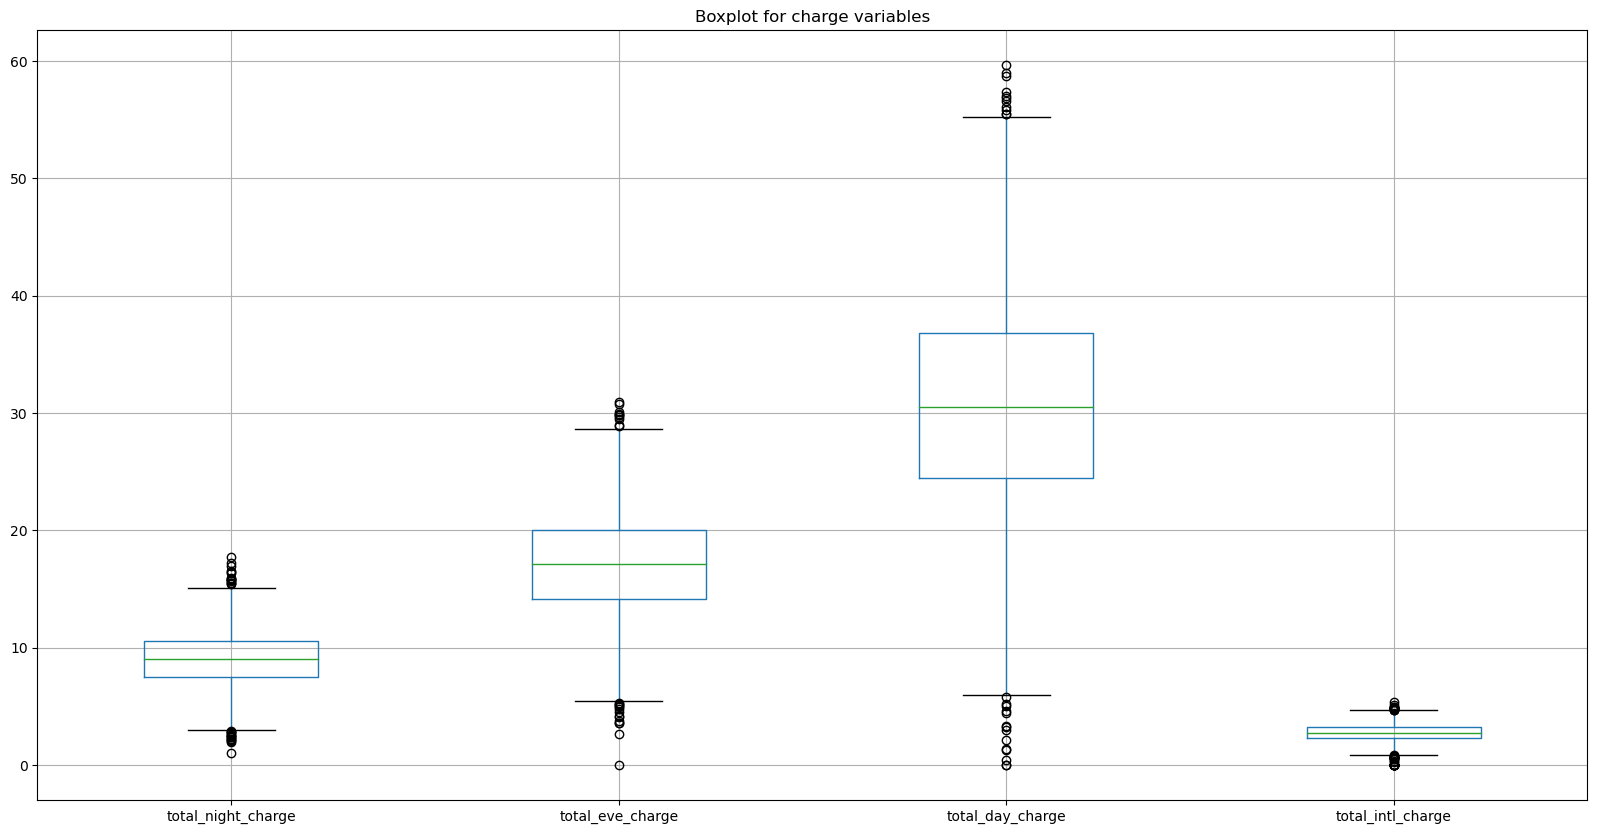

In [93]:
#univariate analysis of continuous variables
type_of_vars = ['customer', 'minutes', 'calls', 'charge']
remaining_list = train_data_copy.columns
for vartype in type_of_vars:
    temp_list = [x for x in remaining_list if vartype in x]
    remaining_list = list(set(remaining_list).difference(set(temp_list)))
    train_data_copy.boxplot(column=temp_list, figsize = (20,10) )
    plt.title('Boxplot for '+ vartype + ' variables')
    plt.show()

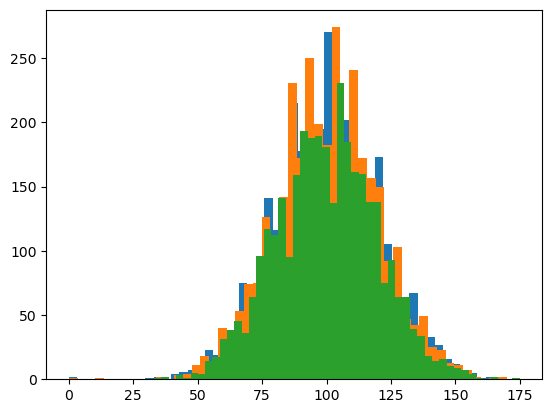

In [83]:
plt.hist(train_data_copy['total_day_calls'],bins=50)
plt.hist(train_data_copy['total_eve_calls'],bins=50)
plt.hist(train_data_copy['total_night_calls'],bins=50)
plt.show()

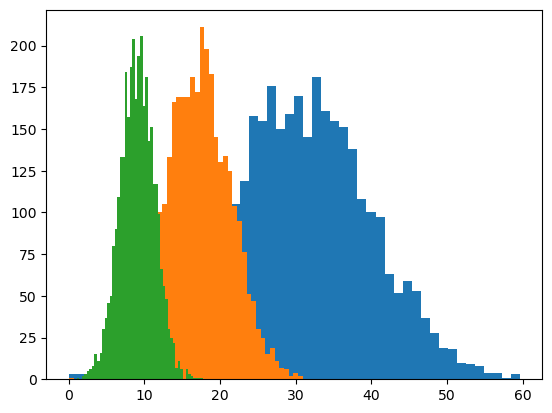

In [66]:
plt.hist(train_data_copy['total_day_charge'],bins=50)
plt.hist(train_data_copy['total_eve_charge'],bins=50)
plt.hist(train_data_copy['total_night_charge'],bins=50)
plt.show()

In [160]:
X = train_data_copy.drop('churn_num',axis=1)

In [177]:
all_corr = X.select_dtypes([np.number]).corr().unstack().reset_index()
corr_table = all_corr[all_corr['level_0'] > all_corr['level_1']]
corr_table.columns = ['var1', 'var2', 'corr_value']
corr_table['corr_abs'] = corr_table['corr_value'].abs()
corr_table = corr_table.sort_values(by= ['corr_abs'], ascending = False )
corr_table.head(15)#total_day_charge, total_eve_charge, total_night_charge, total_intl_charge, voice_mail_plan_num
#these 5 variables can be dropped

/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_4445/2491387739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_table['corr_abs'] = corr_table['corr_value'].abs()


var1                    var2  corr_value  corr_abs
38        total_day_minutes        total_day_charge    1.000000  1.000000
92        total_eve_minutes        total_eve_charge    1.000000  1.000000
146     total_night_minutes      total_night_charge    0.999999  0.999999
200      total_intl_minutes       total_intl_charge    0.999993  0.999993
273     voice_mail_plan_num   number_vmail_messages    0.956927  0.956927
83         total_day_charge  international_plan_num    0.049398  0.049398
49        total_day_minutes  international_plan_num    0.049396  0.049396
202      total_intl_minutes  international_plan_num    0.045871  0.045871
236       total_intl_charge  international_plan_num    0.045780  0.045780
51          total_day_calls          account_length    0.038470  0.038470
233       total_intl_charge        total_intl_calls    0.032372  0.032372
199      total_intl_minutes        total_intl_calls    0.032304  0.032304
185      total_night_charge  international_plan_num   -0.028913  0.028913
151     total_night_minutes  international_plan_num   -0.028905  0.028905
255  international_plan_num          account_length    0.024735  0.024735

<Axes: >

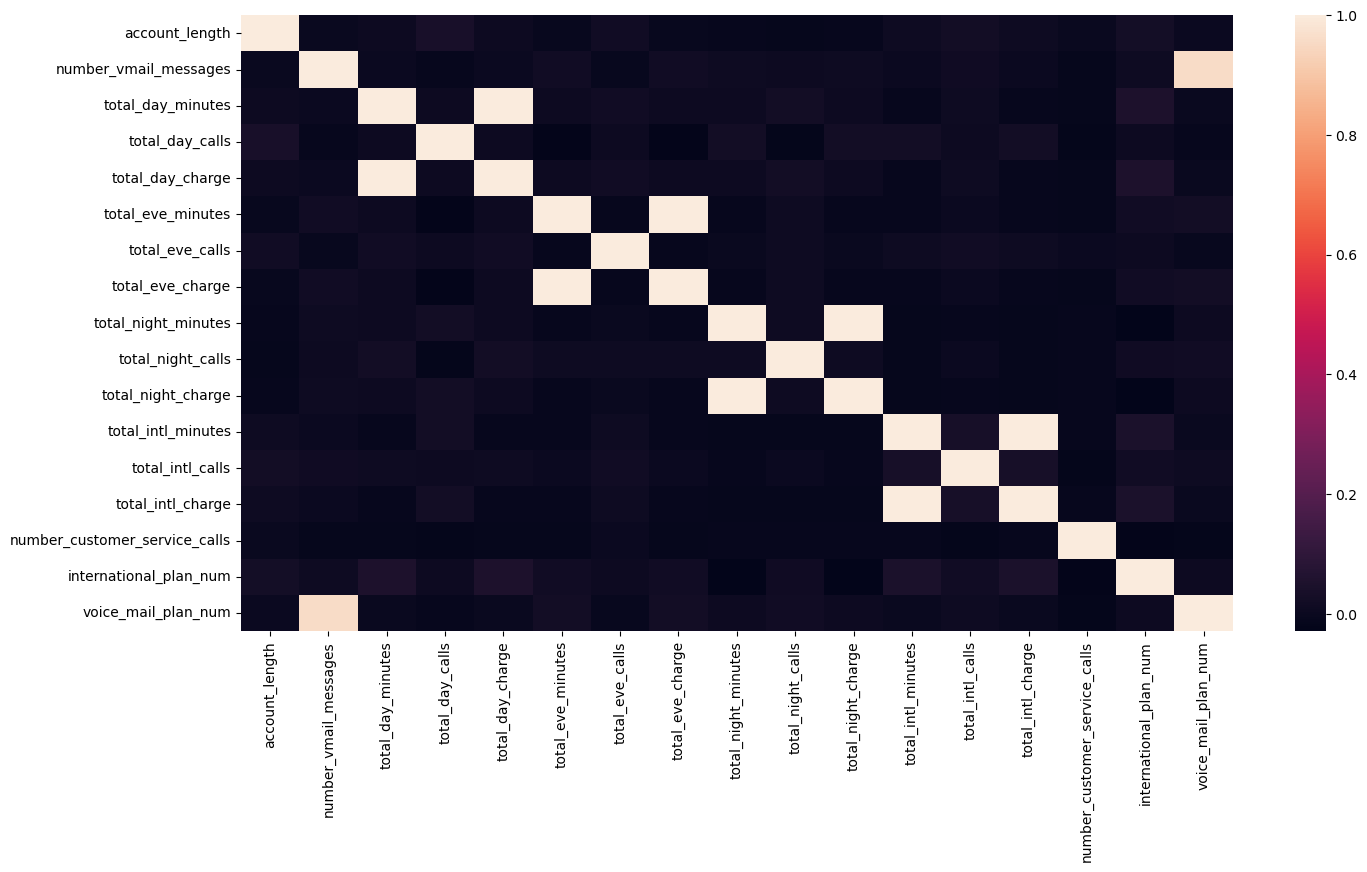

In [188]:
plt.figure(figsize=(16,8))
sns.heatmap(X.select_dtypes(np.number).corr())

/Users/abhijitdeshpande/miniconda3/envs/torch/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


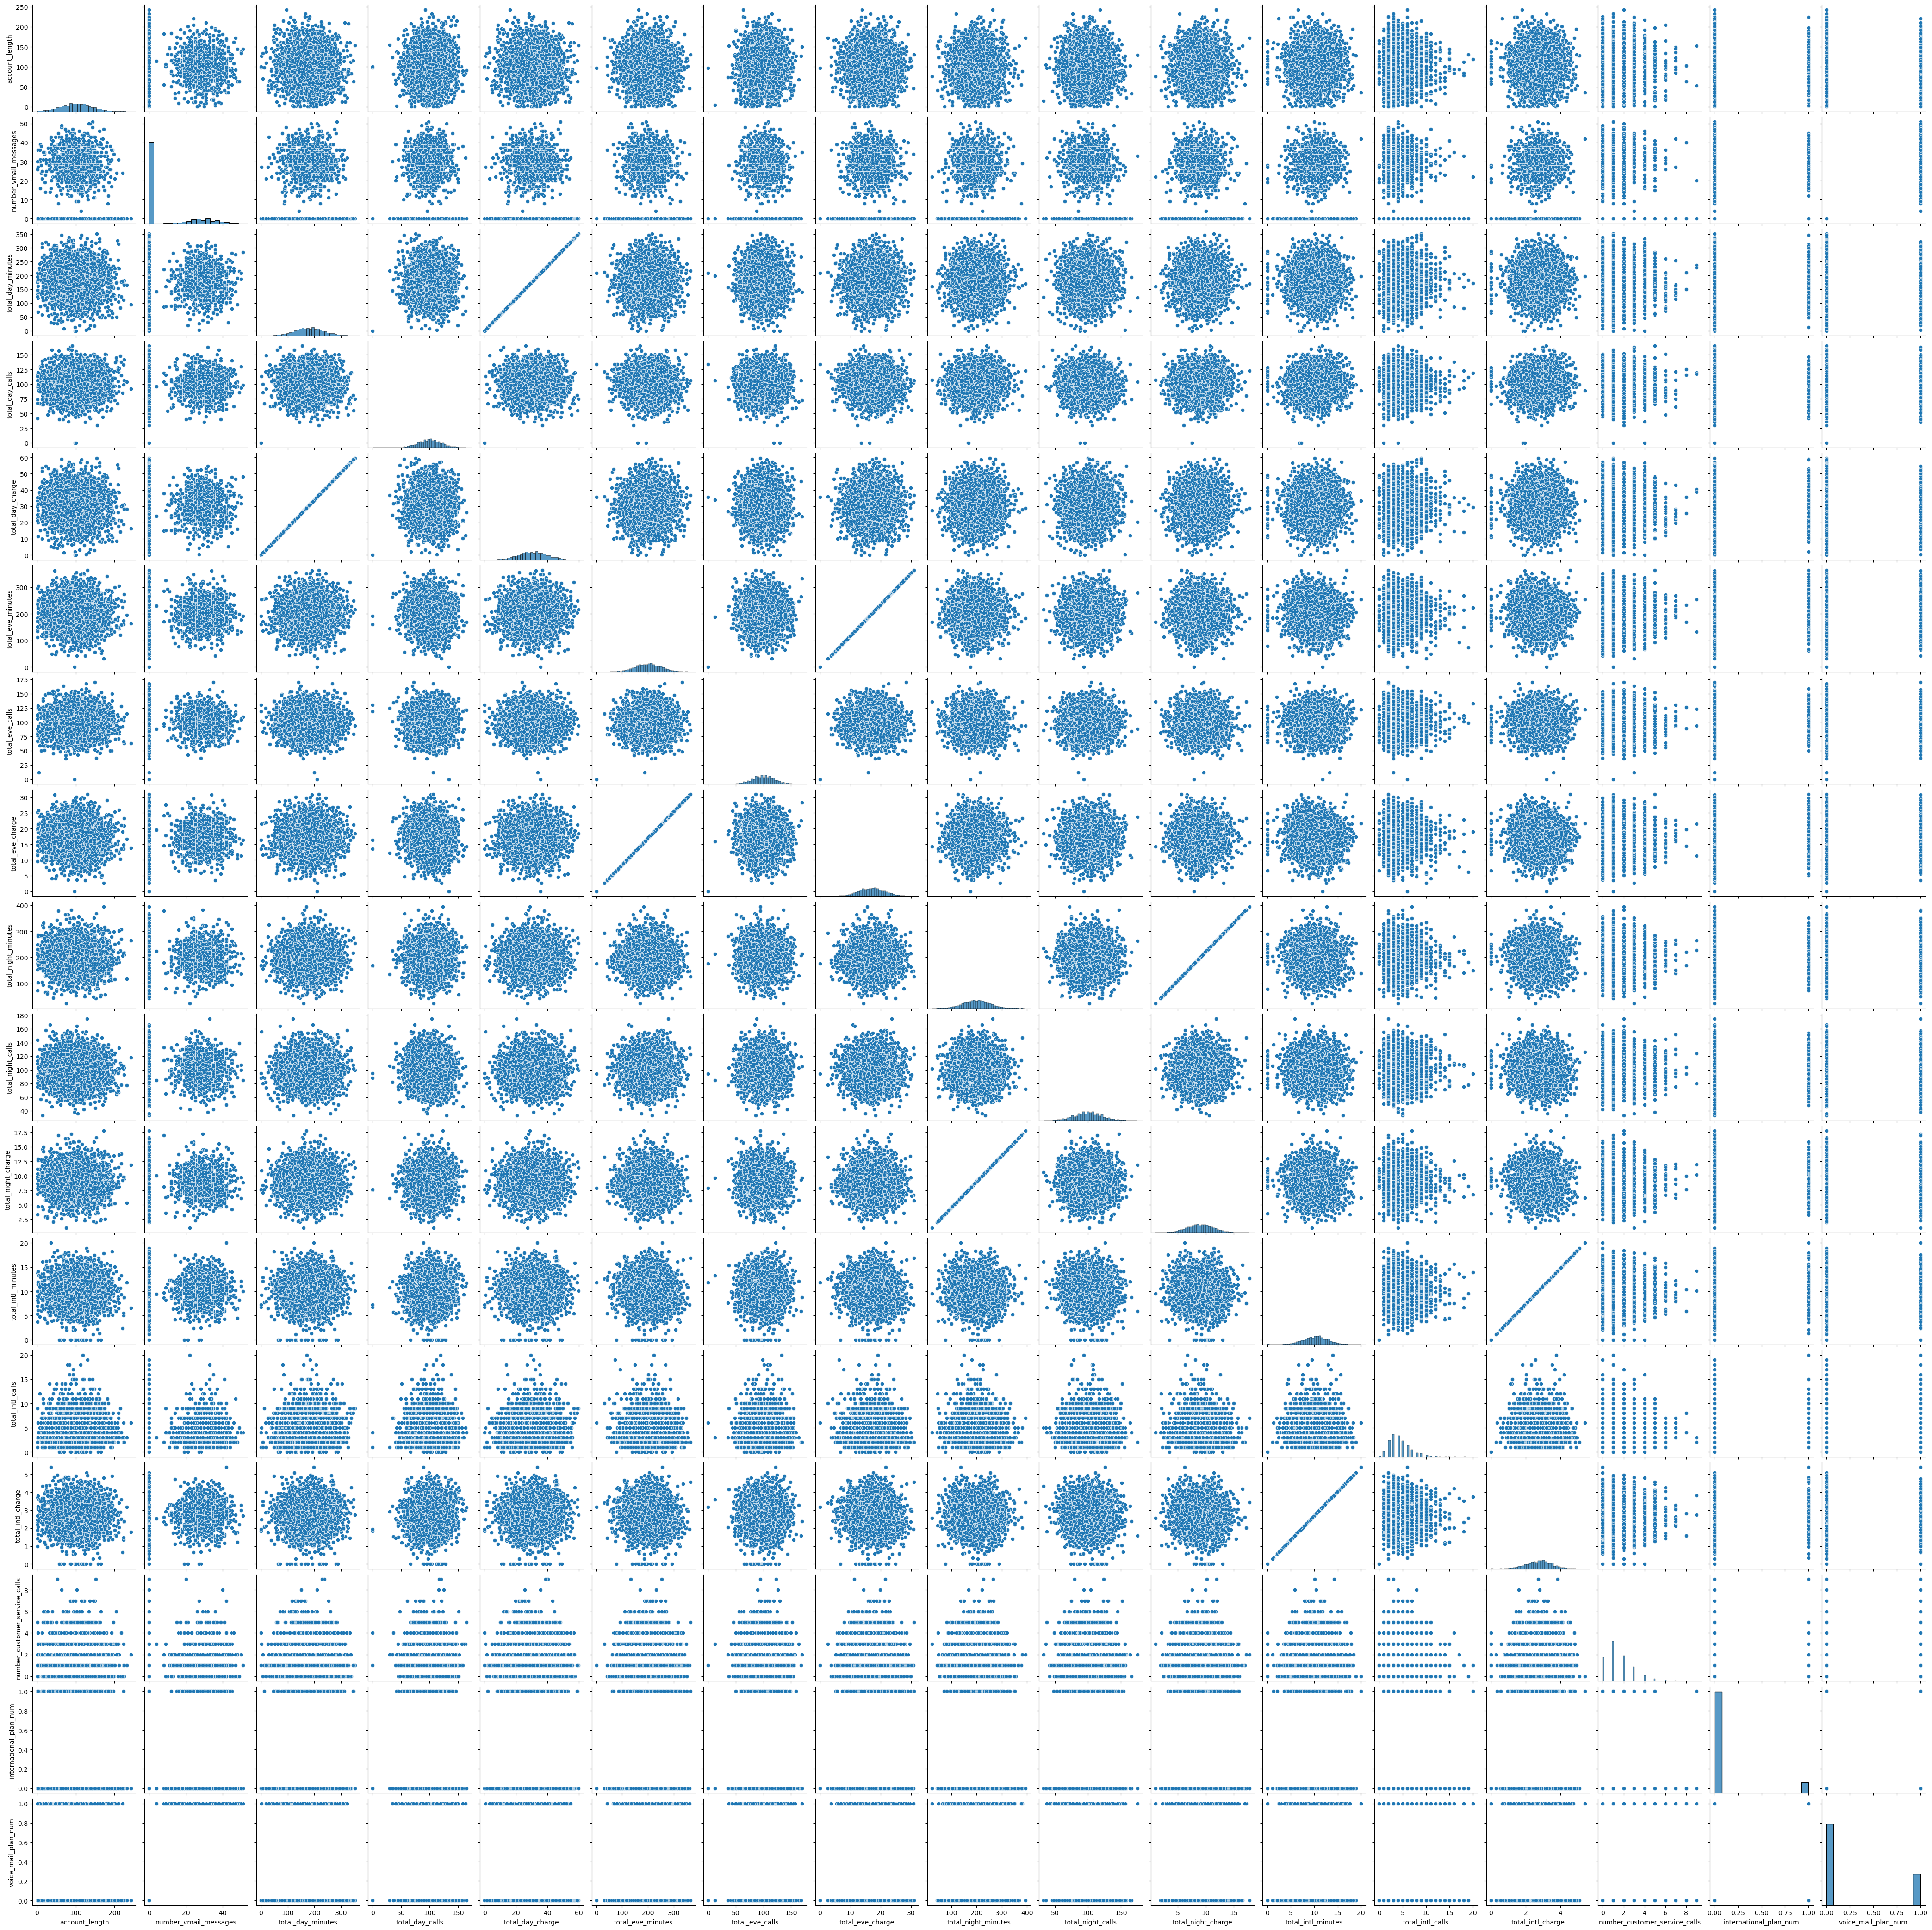

In [189]:
sns.pairplot(X.select_dtypes(np.number))

In [199]:
charges_var = [x for x in train_data_copy.columns if 'charge' in x]
minute_var = [x for x in train_data_copy.columns if 'minute' in x]
charges_var, minute_var

(['total_day_charge',
  'total_eve_charge',
  'total_night_charge',
  'total_intl_charge'],
 ['total_day_minutes',
  'total_eve_minutes',
  'total_night_minutes',
  'total_intl_minutes'])

In [203]:
#Feature creation
train_data_copy['total_charges'] = train_data_copy[charges_var].sum(axis=1)
train_data_copy['total_minutes'] = train_data_copy[minute_var].sum(axis=1)
train_data_copy['charge_per_minute'] = train_data_copy['total_charges']/train_data_copy['total_minutes']

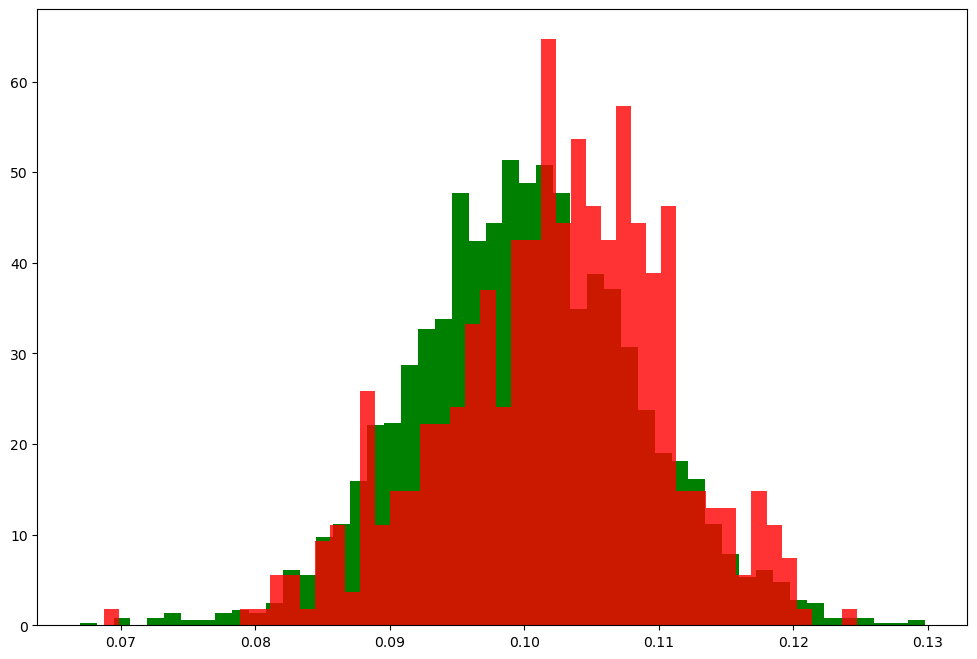

In [246]:
plt.figure(figsize=(12,8))
plt.hist(train_data_copy[train_data_copy['churn_num']==0]['charge_per_minute'], bins=50, density=True, color='g')
plt.hist(train_data_copy[train_data_copy['churn_num']==1]['charge_per_minute'], bins=50, density=True, color='r',alpha=.8)
plt.show()

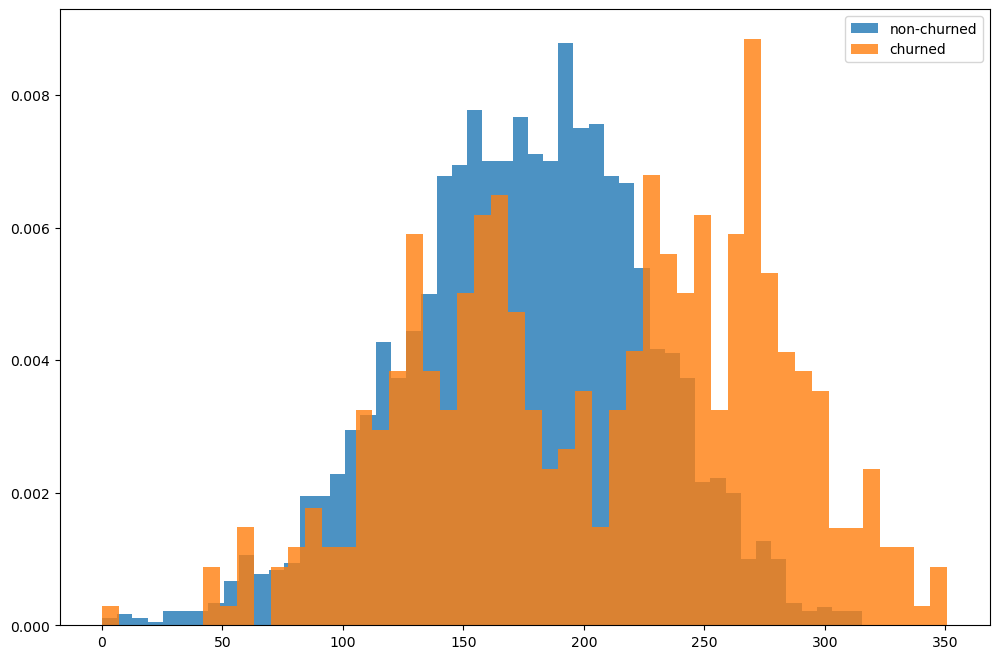

In [241]:
plt.figure(figsize=(12,8))
plt.hist(train_data_copy[train_data_copy['churn_num']==0]['total_day_minutes'],  bins=50, density=True, label='non-churned', alpha=.8)
plt.hist(train_data_copy[train_data_copy['churn_num']==1]['total_day_minutes'],  bins=50, density=True, label = 'churned', alpha=.8)
plt.legend()

In [254]:
train_data_copy[['churn']].value_counts()[1]/train_data_copy[['churn']].value_counts()[0]

0.1694736842105263

In [256]:
train_data_copy[['churn']].value_counts()[0],train_data_copy[['churn']].value_counts()[1]

(2850, 483)

In [268]:
train_data_copy.shape[0]/10

333.3